##Pretrained Models for NLP

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feedback = [
    "No", "NA", "No", "NA", "N/A", "N/A", ".", "None", "NA", "More detailed", "-",
    "Amazing session, please take more of these:)", "Nooo", "NA", "NA",
    "Please provide refreshments to everyone-small chocolates are also fine:)", "-", "NA", "No", "Nope",
    "No Good to go", "Thanks wonderful session", "All good", "-",
    "Try to teach more concepts in short time in simple manner", "Fun session! Would like the notes to be shared! SPEAKERS WERE AMAZING.",
    "Na", "Na", "Great session.", "-", "a quiz at the end would be helpful", "Na", "No improvement", "Nil", "-",
    "Extend timing for the session", "No suggestions", "More about libraries", "It was good",
    "Hands on experiences help learn better!", "No improvements", "No ,just fine",
    "Please send the code in mail to save time and please make sure that your voice reaches last rows for questions. Thank you!",
    "Please send the materials for revision and if any extra materials that too",
    "If you can explain little bit more about basics and give more examples like misal it would be more fun",
    "The session was amazing! Learnt a lot of new concepts. Looking forward to more such interesting events in the future!",
    "NA", "Breaking down the code in a more detailed manner.", "No"
]



In [ ]:
# Convert to DataFrame
df = pd.DataFrame(feedback, columns=["response"])

# Remove neutral responses
neutral_keywords = ["no", "na", "n/a", "none", ".", "-", "nope", "nil"]
df = df[~df["response"].str.lower().isin(neutral_keywords)]



In [ ]:

# Sentiment Analysis
df['sentiment'] = df['response'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

print(df['sentiment'])

# Topic Modeling
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['response'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])



9     0.450000
11    0.533333
12    0.000000
15    0.458333
20   -0.350000
21    0.600000
22    0.700000
24    0.166667
25    0.534375
28    0.800000
30    0.000000
32    0.000000
35    0.000000
36    0.000000
37    0.500000
38    0.700000
39    0.625000
40    0.000000
41    0.416667
42    0.250000
43    0.000000
44    0.322500
45    0.314394
47    0.248148
Name: sentiment, dtype: float64
Topic 0:
['learn', 'detailed', 'code', 'manner', 'breaking', 'session', 'wonderful', 'thanks', 'improvements', 'good']
Topic 1:
['send', 'time', 'materials', 'amazing', 'great', 'libraries', 'nooo', 'improvement', 'suggestions', 'session']
Topic 2:
['chocolates', 'quiz', 'end', 'helpful', 'timing', 'extend', 'session', 'just', 'detailed', 'fine']


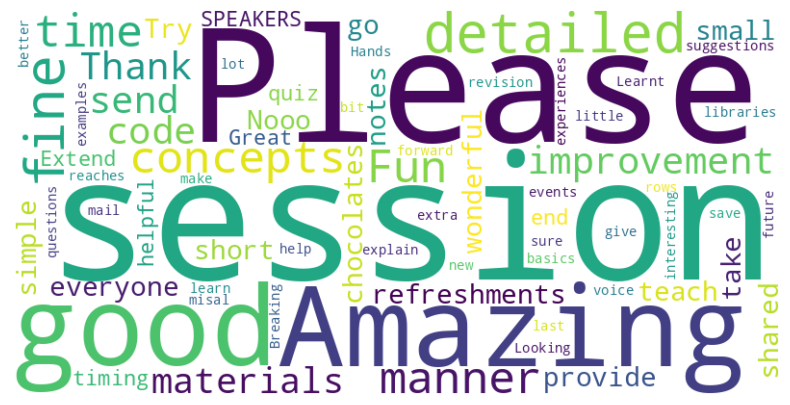

In [ ]:

# Word Cloud
text = " ".join(df['response'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



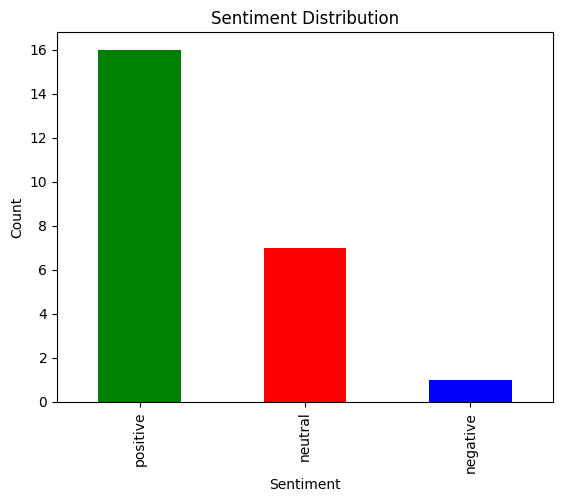

In [ ]:
# Sentiment Distribution
df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

# Sentences
sentences = [
    "Text Blob is a simple Python library used to perform NLP tasks like tokenization, POS-Tagging, Words inflection, Noun phrase extraction, lemmatization, N-grams, and sentiment Analysis.",
    "If you know about the state-of-the-art NLTK library, TextBlob has a few more features than it, such as Spelling correction, Creating a summary of a text, Translation, and language detection.",
    "It is an easy tool that covers all the necessary aspects of natural language processing."
]

# Analyze sentiment for each sentence
for sentence in sentences:
    blob = TextBlob(sentence)
    print(f"Sentence: {sentence}")
    print(f"Polarity: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")
    print("-" * 40)

Sentence: Text Blob is a simple Python library used to perform NLP tasks like tokenization, POS-Tagging, Words inflection, Noun phrase extraction, lemmatization, N-grams, and sentiment Analysis.
Polarity: 0.0, Subjectivity: 0.35714285714285715
----------------------------------------
Sentence: If you know about the state-of-the-art NLTK library, TextBlob has a few more features than it, such as Spelling correction, Creating a summary of a text, Translation, and language detection.
Polarity: 0.09999999999999999, Subjectivity: 0.3666666666666667
----------------------------------------
Sentence: It is an easy tool that covers all the necessary aspects of natural language processing.
Polarity: 0.17777777777777778, Subjectivity: 0.7444444444444445
----------------------------------------


In [ ]:
blob.words

WordList(['Text', 'Blob', 'is', 'a', 'simple', 'Python', 'library', 'used', 'to', 'perform', 'NLP', 'tasks', 'like', 'tokenization', 'POS-Tagging', 'Words', 'inflection', 'Noun', 'phrase', 'extraction', 'lemmatization', 'N-grams', 'and', 'sentiment', 'Analysis', 'If', 'you', 'know', 'about', 'the', 'state-of-the-art', 'NLTK', 'library', 'TextBlob', 'has', 'a', 'few', 'more', 'features', 'than', 'it', 'such', 'as', 'Spelling', 'correction', 'Creating', 'a', 'summary', 'of', 'a', 'text', 'Translation', 'and', 'language', 'detection', 'It', 'is', 'an', 'easy', 'tool', 'that', 'covers', 'all', 'the', 'necessary', 'aspects', 'of', 'natural', 'language', 'processing'])

In [ ]:
blob.sentences

[Sentence("
 Text Blob is a simple Python library used to perform NLP tasks like tokenization, POS-Tagging, Words inflection, Noun phrase extraction, lemmatization, N-grams, and sentiment Analysis."),
 Sentence("If you know about the state-of-the-art NLTK library, TextBlob has a few more features than it, such as  Spelling correction, Creating a summary of a text, Translation, and language detection."),
 Sentence("It is an easy tool that covers all the necessary aspects of natural language processing.")]

In [ ]:
blob.sentiment

Sentiment(polarity=0.11904761904761905, subjectivity=0.5272108843537415)

In [ ]:
from textblob import TextBlob

# Sample text
text = "TextBlob is a amazin librarie for Natural Langage Processing. It makes NLP tasks very easy and fun!"

# Create a TextBlob object
blob = TextBlob(text)

# 1. Tokenization (splitting text into words and sentences)
print("=== Tokenization ===")
print("Words:", blob.words)  # Tokenize into words
print("Sentences:", blob.sentences)  # Tokenize into sentences
print()

# 2. Noun Phrase Extraction
print("=== Noun Phrase Extraction ===")
print("Noun Phrases:", blob.noun_phrases)  # Extract noun phrases
print()

# 3. Sentiment Analysis
print("=== Sentiment Analysis ===")
sentiment = blob.sentiment
print("Polarity:", sentiment.polarity)  # Polarity: -1 (negative) to 1 (positive)
print("Subjectivity:", sentiment.subjectivity)  # Subjectivity: 0 (objective) to 1 (subjective)
print()

# 4. Spelling Correction
print("=== Spelling Correction ===")
corrected_blob = blob.correct()  # Correct spelling errors
print("Original Text:", text)
print("Corrected Text:", corrected_blob)
print()

# 5. Lemmatization
print("=== Lemmatization ===")
for word in blob.words:
    print(f"Word: {word}, Lemma: {word.lemmatize()}")
print()


# 7. Word and Sentence Counts
print("=== Word and Sentence Counts ===")
print("Word Count:", len(blob.words))
print("Sentence Count:", len(blob.sentences))
print()

# 8. Word Inflection (Pluralization and Singularization)
print("=== Word Inflection ===")
word = "apple"
print(f"Singular: {word}, Plural: {TextBlob(word).words.pluralize()[0]}")
word = "cats"
print(f"Plural: {word}, Singular: {TextBlob(word).words.singularize()[0]}")
print()

# 9. N-grams
print("=== N-grams ===")
print("Bigrams:", blob.ngrams(n=2))  # Generate bigrams
print("Trigrams:", blob.ngrams(n=3))  # Generate trigrams

=== Tokenization ===
Words: ['TextBlob', 'is', 'a', 'amazin', 'librarie', 'for', 'Natural', 'Langage', 'Processing', 'It', 'makes', 'NLP', 'tasks', 'very', 'easy', 'and', 'fun']
Sentences: [Sentence("TextBlob is a amazin librarie for Natural Langage Processing."), Sentence("It makes NLP tasks very easy and fun!")]

=== Noun Phrase Extraction ===
Noun Phrases: ['textblob', 'amazin librarie', 'langage processing', 'nlp']

=== Sentiment Analysis ===
Polarity: 0.3461111111111111
Subjectivity: 0.5333333333333333

=== Spelling Correction ===
Original Text: TextBlob is a amazin librarie for Natural Langage Processing. It makes NLP tasks very easy and fun!
Corrected Text: TextBlob is a amazing libraries for Natural Language Processing. It makes NLP tasks very easy and fun!

=== Lemmatization ===
Word: TextBlob, Lemma: TextBlob
Word: is, Lemma: is
Word: a, Lemma: a
Word: amazin, Lemma: amazin
Word: librarie, Lemma: librarie
Word: for, Lemma: for
Word: Natural, Lemma: Natural
Word: Langage, Lemm